# solve_ivpを用いた常微分方程式の解法
solve_ivp:Solving initial value problems<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html<br>
解法のうちRadauの説明：https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods

In [1]:
# -*- coding: utf-8 -*-
import numpy as np  
from scipy.integrate import solve_ivp  
import matplotlib.pyplot as plt  

%matplotlib inline

In [2]:
def dFunc(time, x, mass, damper, spring, u):
    dx0 = x[1]
    dx1 = (-1/mass)*(damper*x[1] + spring*x[0] - u) 
    return [dx0, dx1]

In [3]:
x0 = [0.0, 0.0]
u = 1.0
mass, damper, spring = 4.0, 1.0, 1.0
T_END = 20

In [4]:
# Solve ODE  
sol = solve_ivp(fun=dFunc, t_span=[0, T_END], y0=x0, method='RK45', args=[mass, damper, spring, u], dense_output=True)  

In [5]:
print(type(sol))
print(sol)

<class 'scipy.integrate._ivp.ivp.OdeResult'>
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  1.902e+01  2.000e+01]
        y: [[ 0.000e+00  1.250e-09 ...  1.085e+00  1.084e+00]
            [ 0.000e+00  2.500e-05 ...  1.016e-02 -1.075e-02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x15f0b0b60>
 t_events: None
 y_events: None
     nfev: 116
     njev: 0
      nlu: 0


In [6]:
#時間の出力
print(sol.t.size)
print(sol.t)

17
[0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 1.11100000e-01 7.36943993e-01 1.93584329e+00 3.61521727e+00
 5.61594165e+00 7.30007256e+00 8.98420347e+00 1.13551604e+01
 1.31860484e+01 1.50169364e+01 1.70788365e+01 1.90244255e+01
 2.00000000e+01]


In [7]:
#yの出力
print(sol.y[0].size, sol.y[1].size)
print(sol.y)

17 17
[[ 0.00000000e+00  1.24998958e-09  1.51236133e-07  1.53869742e-05
   1.52832286e-03  6.31912954e-02  3.71837470e-01  9.51858459e-01
   1.39915980e+00  1.41030382e+00  1.19386242e+00  8.73549882e-01
   8.04151543e-01  8.83023133e-01  1.01957155e+00  1.08514940e+00
   1.08442842e+00]
 [ 0.00000000e+00  2.49996875e-05  2.74962177e-04  2.77113902e-03
   2.73787354e-02  1.64480763e-01  3.26709974e-01  3.23317815e-01
   1.04957722e-01 -7.92248267e-02 -1.56874694e-01 -8.81303089e-02
   9.93893729e-03  6.57258269e-02  5.56997288e-02  1.01616617e-02
  -1.07534350e-02]]


In [8]:
tc = np.linspace(0, T_END, 100)  
yc = sol.sol(tc)
print(len(tc), len(yc))

100 2


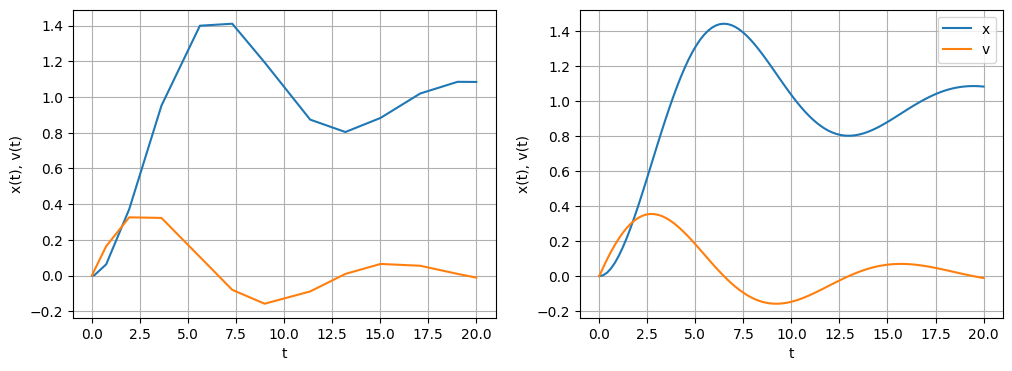

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

ax[0].plot(sol.t, sol.y.T)
ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t), v(t)')
ax[0].grid()

ax[1].plot(tc, yc[0].T, label='x')
ax[1].plot(tc, yc[1].T, label='v')
ax[1].set_xlabel('t')
ax[1].set_ylabel('x(t), v(t)')
ax[1].grid()
ax[1].legend()


#plt.savefig('fig_NC_ODE.png')
plt.show()